In [6]:
import dask.dataframe as dd

# Load the training data using Dask
train = dd.read_csv('amex-default-prediction/train_data.csv')

# Load the labels
labels = dd.read_csv('amex-default-prediction/train_labels.csv')

# Merge labels with data (Dask will handle the merge efficiently)
train = train.merge(labels, on="customer_ID")

# Compute the result (Dask will perform computations lazily until you call compute)
train = train.compute()

# Display basic info
print(train.shape)
print(train.head())


(5531451, 191)
                                         customer_ID         S_2       P_2  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09  0.938469   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07  0.936665   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28  0.954180   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13  0.960384   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16  0.947248   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.001733  0.008724  1.006838  0.009228  0.124035  0.008771  0.004709  ...   
1  0.005775  0.004923  1.000653  0.006151  0.126750  0.000798  0.002714  ...   
2  0.091505  0.021655  1.009672  0.006815  0.123977  0.007598  0.009423  ...   
3  0.002455  0.013683  1.002700  0.001373  0.117169  0.000685  0.005531  ...   
4  0.002483  0.015193  1.000727  0.007605  0.117325  0.004653  0.009312  ...   

   D_137  D_138     D_139     D_140

From the website:
- Independent Variables:
    - D_* = Delinquency variables
    - S_* = Spend variables
    - P_* = Payment variables
    - B_* = Balance variables
    - R_* = Risk variables

- Dependent Variables:
    - 'prediction' for each 'customer_ID' = (float) [0,1],
        where 1 indicates customer defaulted and 0 indicates customer did not default

To see example, below is a printed full column of one row (1 customer full data)

In [56]:
import pandas as pd

example = train.iloc[0].to_dict()
print("One data point:")
print(example)

print("All columns: ", train.columns.tolist())

One data point:
{'customer_ID': '0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', 'S_2': '2017-04-07', 'P_2': 0.9366646050988444, 'D_39': 0.0057754430691282, 'B_1': 0.0049233526310337, 'B_2': 1.0006531959897804, 'R_1': 0.0061513089005826, 'S_3': 0.126749984407325, 'D_41': 0.0007983594950325, 'B_3': 0.00271357521442, 'D_42': nan, 'D_43': nan, 'D_44': 0.0025262722985727, 'B_4': 0.0694191902513324, 'D_45': 0.7127947253698276, 'B_5': 0.1132386241994063, 'R_2': 0.0062056675505455, 'D_46': 0.35362955018564, 'D_47': 0.5213112572080865, 'D_48': 0.223328868696034, 'D_49': nan, 'B_6': 0.0652610579665619, 'B_7': 0.0577437664347247, 'B_8': 0.0016140100403202, 'D_50': 0.1497225381697136, 'D_51': 1.3397939519002633, 'B_9': 0.0083732399772736, 'R_3': 0.0019844317102694, 'D_52': 0.2027776508714612, 'P_3': 0.7208864251163005, 'B_10': 0.09980397147994, 'D_53': nan, 'S_5': 0.0305985529867176, 'B_11': 0.0027493629604935, 'S_6': 0.0024820657778834, 'D_54': 1.00903338642927, 'R_4': 0.00513

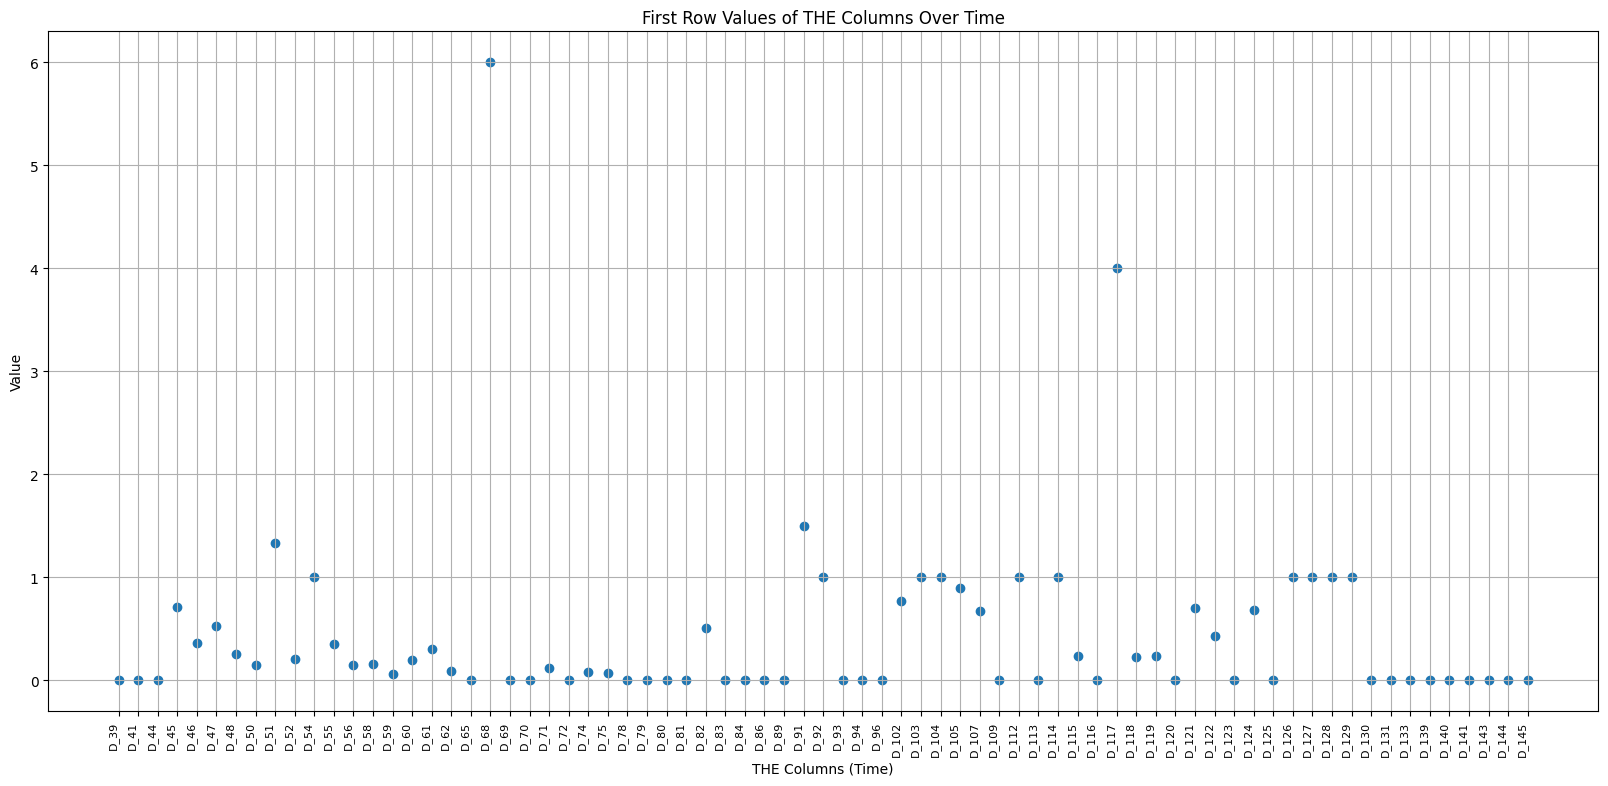

In [57]:
import matplotlib.pyplot as plt

# Select THE columns (comment and uncomment as needed)
THE_columns = [col for col in train.columns if col.startswith('D_')]
# THE_columns = [col for col in train.columns if col.startswith('S_')]
# THE_columns = [col for col in train.columns if col.startswith('P_')]
# THE_columns = [col for col in train.columns if col.startswith('B_')]
# THE_columns = [col for col in train.columns if col.startswith('R_')]


# Get the first row of the dataset
first_row = train.iloc[0]

# Remove NaN values from the first row (if they exist)
cleaned_first_row = first_row.dropna()

# Create the dictionary with cleaned data, only including columns that exist in the first row
# Convert values to numeric, ignoring errors (e.g., 'CR' or 'O' will be converted to NaN)
data_dict = {col: pd.to_numeric(cleaned_first_row[col], errors='coerce') for col in cleaned_first_row.index if col in THE_columns}

# Remove any NaN values resulting from conversion
data_dict = {k: v for k, v in data_dict.items() if not pd.isna(v)}


# Plot the cleaned data
plt.figure(figsize=(20, 10))

# Plot the values using the cleaned data
plt.scatter(list(data_dict.keys()), list(data_dict.values()), label="First row", marker='o')

# Customize the plot
plt.title('First Row Values of THE Columns Over Time')
plt.xlabel('THE Columns (Time)')
plt.ylabel('Value')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotate x-axis labels for better readability
plt.subplots_adjust(bottom=0.2)
plt.grid(True)

# Show the plot
plt.show()


Weird Findings:
- Why is S_2 a datetime value? But the rest of S_* values are just float